In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn import linear_model
import warnings
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Part 1
## (60%) Stepwise Regression and Regularization- Ridge, Lasso, and Elastic Net

## Read the data

In [2]:
df = pd.read_csv("./drive/MyDrive/Homework/Manufacturing Data Science/HW2/MiningProcess_Flotation_Plant_Database.csv")
df = df.apply(lambda x: x.str.replace(',','.'))
X = df.drop(["date", "% Iron Concentrate", "% Silica Concentrate"], axis=1).astype(float)
y = df["% Silica Concentrate"].astype(float)
X.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level
0,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,295.096,306.4,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344
1,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,295.096,306.4,250.137,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075
2,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,295.096,306.4,251.345,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567
3,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,295.096,306.4,250.422,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669
4,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,295.096,306.4,249.983,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679


## (a) (5%) Identify the important variable by linear regression with ordinary least squares (OLS) (i.e. ranked by p-value)

In [3]:
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     % Silica Concentrate   R-squared:                       0.153
Model:                              OLS   Adj. R-squared:                  0.153
Method:                   Least Squares   F-statistic:                     6339.
Date:                  Wed, 10 Nov 2021   Prob (F-statistic):               0.00
Time:                          12:56:12   Log-Likelihood:            -1.0724e+06
No. Observations:                737453   AIC:                         2.145e+06
Df Residuals:                    737431   BIC:                         2.145e+06
Df Model:                            21                                         
Covariance Type:              nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            4.2107      0.245     17.202      0.000       3.731       4.690
% Iron Feed                     -0.0027      0.001     -2.654      0.008      -0.005      -0.001
% Silica Feed                    0.0078      0.001     10.111      0.000       0.006       0.009
Starch Flow                  -3.844e-05   1.12e-06    -34.461      0.000   -4.06e-05   -3.63e-05
Amina Flow                       0.0032   1.94e-05    166.210      0.000       0.003       0.003
Ore Pulp Flow                   -0.0046      0.000    -33.503      0.000      -0.005      -0.004
Ore Pulp pH                     -0.3259      0.003    -95.518      0.000      -0.333      -0.319
Ore Pulp Density                -1.9343      0.025    -78.356      0.000      -1.983      -1.886
Flotation Column 01 Air Flow    -0.0089      0.000    -61.998      0.000      -0.009      -0.009
Flotation Column 02 Air Flow     0.0011   8.34e-05     12.851      0.000       0.001       0.001
Flotation Column 03 Air Flow    -0.0055      0.000    -35.021      0.000      -0.006      -0.005
Flotation Column 04 Air Flow     0.0353      0.001     58.274      0.000       0.034       0.037
Flotation Column 05 Air Flow    -0.0065      0.000    -17.874      0.000      -0.007      -0.006
Flotation Column 06 Air Flow     0.0028   8.34e-05     33.570      0.000       0.003       0.003
Flotation Column 07 Air Flow   9.55e-05    8.7e-05      1.097      0.272    -7.5e-05       0.000
Flotation Column 01 Level       -0.0002   1.57e-05    -12.295      0.000      -0.000      -0.000
Flotation Column 02 Level    -4.868e-05   1.45e-05     -3.366      0.001    -7.7e-05   -2.03e-05
Flotation Column 03 Level        0.0002   1.25e-05     15.116      0.000       0.000       0.000
Flotation Column 04 Level       -0.0003   1.89e-05    -15.852      0.000      -0.000      -0.000
Flotation Column 05 Level       -0.0012   2.35e-05    -49.738      0.000      -0.001      -0.001
Flotation Column 06 Level     7.496e-05   1.81e-05      4.145      0.000    3.95e-05       0.000
Flotation Column 07 Level       -0.0003   2.23e-05    -15.448      0.000      -0.000      -0.000
==============================================================================
Omnibus:                    73854.925   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            98099.188
Skew:                           0.882   Prob(JB):                         0.00
Kurtosis:                       3.285   Cond. No.                     7.00e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  7e+05. This might indic

In [4]:
est.pvalues.drop("const").sort_values()

Flotation Column 04 Air Flow     0.000000e+00
Flotation Column 05 Level        0.000000e+00
Amina Flow                       0.000000e+00
Ore Pulp pH                      0.000000e+00
Ore Pulp Density                 0.000000e+00
Flotation Column 01 Air Flow     0.000000e+00
Flotation Column 03 Air Flow    1.772487e-268
Starch Flow                     5.019581e-260
Flotation Column 06 Air Flow    7.011320e-247
Ore Pulp Flow                   6.632587e-246
Flotation Column 05 Air Flow     1.938375e-71
Flotation Column 04 Level        1.390356e-56
Flotation Column 07 Level        7.951171e-54
Flotation Column 03 Level        1.298206e-51
Flotation Column 02 Air Flow     8.590183e-38
Flotation Column 01 Level        9.720506e-35
% Silica Feed                    4.953101e-24
Flotation Column 06 Level        3.403839e-05
Flotation Column 02 Level        7.633120e-04
% Iron Feed                      7.956906e-03
Flotation Column 07 Air Flow     2.724305e-01
dtype: float64

從上方程式得到的得到的p-value可以得知，重要的變數除了Flotation Column 07 Air Flow以外剩下都是重要變數，但從模型的但從模型的R-squared換發現這個模型的預測能力還不夠好，因此用p-value無法挑出真正的重要變數。

## (b) (5%) Identify the important variable by stepwise regression. (hint: you can select forward selection, backward elimination, or both)


In [5]:
X = X.drop('const', axis=1)
clf = LinearRegression()
sfs_back = sfs(clf, k_features = 1, forward=False, floating=False, n_jobs=-1)
sfs_back = sfs_back.fit(X.values, y, custom_feature_names=tuple(X.columns))
sfs_back.get_metric_dict()

{1: {'avg_score': -0.022743209572463608,
  'ci_bound': 0.05918043657546904,
  'cv_scores': array([-0.06882758,  0.05621407, -0.05948607, -0.04184252,  0.00022604]),
  'feature_idx': (7,),
  'feature_names': ('Flotation Column 01 Air Flow',),
  'std_dev': 0.04604439020965399,
  'std_err': 0.023022195104826997},
 2: {'avg_score': 0.02173804894760043,
  'ci_bound': 0.0816745543829796,
  'cv_scores': array([-0.03001372,  0.13357288, -0.04843293,  0.02290394,  0.03066007]),
  'feature_idx': (7, 18),
  'feature_names': ('Flotation Column 01 Air Flow',
   'Flotation Column 05 Level'),
  'std_dev': 0.06354557806301064,
  'std_err': 0.03177278903150532},
 3: {'avg_score': 0.03674136716233176,
  'ci_bound': 0.07182220166691432,
  'cv_scores': array([-0.0223267 ,  0.12042736, -0.01476216,  0.01773019,  0.08263815]),
  'feature_idx': (3, 7, 18),
  'feature_names': ('Amina Flow',
   'Flotation Column 01 Air Flow',
   'Flotation Column 05 Level'),
  'std_dev': 0.05588011293310832,
  'std_err': 0.027

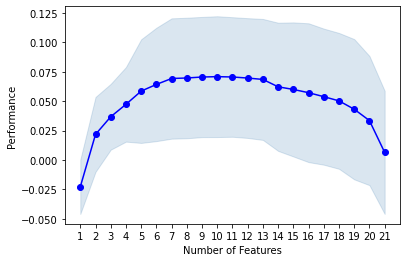

In [6]:
fig = plot_sfs(sfs_back.get_metric_dict(), kind='std_err')

In [7]:
selected_features = pd.DataFrame.from_dict(sfs_back.get_metric_dict()).T.sort_values(by="avg_score",ascending=False).drop(["cv_scores"],axis=1)
selected_features

,feature_idx,avg_score,feature_names,ci_bound,std_dev,std_err
10,"(1, 2, 3, 5, 6, 7, 11, 12, 18, 20)",0.0707906,"(% Silica Feed, Starch Flow, Amina Flow, Ore P...",0.131849,0.102583,0.0512915
11,"(1, 2, 3, 5, 6, 7, 11, 12, 17, 18, 20)",0.0705025,"(% Silica Feed, Starch Flow, Amina Flow, Ore P...",0.13051,0.101541,0.0507707
9,"(1, 2, 3, 5, 6, 7, 11, 12, 18)",0.0704737,"(% Silica Feed, Starch Flow, Amina Flow, Ore P...",0.131183,0.102065,0.0510324
8,"(1, 2, 3, 5, 6, 7, 12, 18)",0.0696548,"(% Silica Feed, Starch Flow, Amina Flow, Ore P...",0.131544,0.102345,0.0511727
12,"(1, 2, 3, 5, 6, 7, 11, 12, 17, 18, 19, 20)",0.069603,"(% Silica Feed, Starch Flow, Amina Flow, Ore P...",0.130722,0.101706,0.0508531
7,"(1, 3, 5, 6, 7, 12, 18)",0.0692164,"(% Silica Feed, Amina Flow, Ore Pulp pH, Ore P...",0.131328,0.102177,0.0510887
13,"(1, 2, 3, 5, 6, 7, 8, 11, 12, 17, 18, 19, 20)",0.0684266,"(% Silica Feed, Starch Flow, Amina Flow, Ore P...",0.132027,0.102722,0.0513609
6,"(3, 5, 6, 7, 12, 18)",0.0641927,"(Amina Flow, Ore Pulp pH, Ore Pulp Density, Fl...",0.123757,0.0962871,0.0481436
14,"(1, 2, 3, 5, 6, 7, 8, 11, 12, 14, 17, 18, 19, 20)",0.0621655,"(% Silica Feed, Starch Flow, Amina Flow, Ore P...",0.139896,0.108844,0.0544219
15,"(1, 2, 3, 5, 6, 7, 8, 11, 12, 14, 16, 17, 18, ...",0.0599317,"(% Silica Feed, Starch Flow, Amina Flow, Ore P...",0.146322,0.113843,0.0569217


In [8]:
selected_features.iloc[[0], [2]].squeeze()

('% Silica Feed',
 'Starch Flow',
 'Amina Flow',
 'Ore Pulp pH',
 'Ore Pulp Density',
 'Flotation Column 01 Air Flow',
 'Flotation Column 05 Air Flow',
 'Flotation Column 06 Air Flow',
 'Flotation Column 05 Level',
 'Flotation Column 07 Level')

因為數據中的n>p，所以採用back stepwise。

('% Silica Feed',
 'Starch Flow',
 'Amina Flow',
 'Ore Pulp pH',
 'Ore Pulp Density',
 'Flotation Column 01 Air Flow',
 'Flotation Column 05 Air Flow',
 'Flotation Column 06 Air Flow',
 'Flotation Column 05 Level',
 'Flotation Column 07 Level')是使用stepwise regression得到的重要變數。

## (c) (5%) Give a comparison between (a) and (b). The results are consistent?

從(a),(b)小題可以發現得到的重要變數是不一樣的，使用OLS得到的得到的p-value都非常小，無法看出真正重要的變數，而且執行結果也跳出condition number過大，表示有共線性的狀況，因此預測的結果不應該採用。而使用back stepwise是逐一移除變數去看何時R-squared最小，因此在統計上挑出的變數較有意義。


## (d) (5%) From a methodology aspect, what’s the difference between Ridge regression and Lasso? Why does Lasso support the variables selection rather than ridge? (hint: answer with description or formulation. No computation needed.)

Ridge regreesion只能把不具影響力的變數係數變成趨近於0，而Lasso則是能夠將不具影響力的變數係數設成0，當變數設成0的時候就代表此變數在模型中被剔除了，達到了變數篩選的作用。


## (5%) What’s the benefit to use the Elastic Net? (hint: answer with description or formulation. No computation needed.)

Elastic Net是結合了Ridge regreesion跟Lasso的特性，在多個高度相關的變數中，Lasso可能會將有影響的變數係數設為0，而Ridge regreesion則是會將這些變數係數一起降低，所以Elastic Net不會直接將這些高度相關的變數係數設成0，達到了能夠變數篩選又能有正則化的優勢。

## (f) (5%) Identify the important variable by ridge regression.

In [9]:
warnings.filterwarnings("ignore")

In [10]:
ridge_cv = linear_model.RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 10], cv=5).fit(X, y)
ridge_cv.alpha_

10.0

In [11]:
ridge_cv.coef_

array([-2.69483085e-03,  7.84245053e-03, -3.85002880e-05,  3.22404822e-03,
       -4.63105457e-03, -3.26031910e-01, -1.92340961e+00, -8.86454517e-03,
        1.06970607e-03, -5.48951657e-03,  3.53338464e-02, -6.54162548e-03,
        2.80120633e-03,  9.51658146e-05, -1.93532839e-04, -4.88420428e-05,
        1.88765454e-04, -2.99976410e-04, -1.17036353e-03,  7.49031923e-05,
       -3.43941040e-04])

In [12]:
X.columns[ridge_cv.coef_ != 0.]

Index(['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level'],
      dtype='object')

重要變數有：


> ['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level']



## (g) (5%) Identify the important variable by lasso.

In [13]:
lasso_cv = linear_model.LassoCV(cv=5, random_state=0, max_iter=10000).fit(X, y)
lasso_cv.alpha_

2.0978645740735415

In [14]:
lasso_cv.coef_

array([-0.00000000e+00,  0.00000000e+00, -6.92480528e-05,  1.78253096e-03,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -6.27132076e-03,
       -0.00000000e+00, -2.37109829e-04,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.49657542e-05, -4.00064782e-04, -1.22919373e-03, -0.00000000e+00,
       -4.22456654e-04])

In [15]:
X.columns[lasso_cv.coef_ != 0.]

Index(['Starch Flow', 'Amina Flow', 'Flotation Column 01 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 07 Level'],
      dtype='object')

重要的變數有：


> ['Starch Flow', 'Amina Flow', 'Flotation Column 01 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 07 Level']


## (h) (5%) Identify the important variable by elastic net.

In [16]:
elastic_cv = linear_model.ElasticNetCV(l1_ratio=[.1, .3, .5, .7, .9, .95, .99], max_iter=5000, cv=5, random_state=0).fit(X, y)
elastic_cv.alpha_

2.119055125326809

In [17]:
elastic_cv.coef_

array([-0.00000000e+00,  0.00000000e+00, -6.92484190e-05,  1.78252487e-03,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -6.26978178e-03,
       -0.00000000e+00, -2.38611641e-04,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.49693413e-05, -4.00072459e-04, -1.22917653e-03, -0.00000000e+00,
       -4.22449062e-04])

In [18]:
X.columns[elastic_cv.coef_ != 0.]

Index(['Starch Flow', 'Amina Flow', 'Flotation Column 01 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 07 Level'],
      dtype='object')

重要的變數有：


> ['Starch Flow', 'Amina Flow', 'Flotation Column 01 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 07 Level']



## (i) (5%) Give a comparison between (f), (g) and (h). The results are consistent?

使用使用Ridge regression所挑選出的變數與其他的不同，Lasso跟elastic net挑出的變數則是相同的，但去觀察Lasso跟elastic net得到的變數係數其實還是不一樣的。這代表這個elastic net使用Lasso的比例比較高。

## (j) (5%) What is “adaptive elastic net”? Why we need it? How to build it? Please simply describe or formulate it. (No computation needed.)

adaptive elastic net其實就是結合了adaptive Lasso跟elastic net，因為Lasso缺少了oracle property以及在處理高維度資料的不穩定性(易有共線性問題)，而adaptive Lasso實現了oracle property，elastic net則是可以處理高維度資料的共線性，因此adaptive elastic net更為適合用來處理高維度資料。

adaptive elastic net建立的方法就是利用elastic net estimator去計算出adaptive weights，再依據adaptive weights去建立出adaptive Lasso，最後結合Ridge regression得到adaptive elastic net的變數係數。

## (k) (5%) Which columns are highly-correlated? Show the table of the coefficient estimation by using linear regression. Any multicollinearity problem?

In [19]:
x_temp = sm.add_constant(X)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, i) for i in range(x_temp.values.shape[1])]
vif["features"] = x_temp.columns
vif.round(1)

,VIF Factor,features
0,41174.1,const
1,19.3,% Iron Feed
2,19.1,% Silica Feed
3,1.3,Starch Flow
4,2.2,Amina Flow
5,1.2,Ore Pulp Flow
6,1.2,Ore Pulp pH
7,2.0,Ore Pulp Density
8,12.3,Flotation Column 01 Air Flow
9,4.3,Flotation Column 02 Air Flow


In [20]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     % Silica Concentrate   R-squared:                       0.153
Model:                              OLS   Adj. R-squared:                  0.153
Method:                   Least Squares   F-statistic:                     6339.
Date:                  Wed, 10 Nov 2021   Prob (F-statistic):               0.00
Time:                          13:03:27   Log-Likelihood:            -1.0724e+06
No. Observations:                737453   AIC:                         2.145e+06
Df Residuals:                    737431   BIC:                         2.145e+06
Df Model:                            21                                         
Covariance Type:              nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            4.2107      0.245     17.202      0.000       3.731       4.690
% Iron Feed                     -0.0027      0.001     -2.654      0.008      -0.005      -0.001
% Silica Feed                    0.0078      0.001     10.111      0.000       0.006       0.009
Starch Flow                  -3.844e-05   1.12e-06    -34.461      0.000   -4.06e-05   -3.63e-05
Amina Flow                       0.0032   1.94e-05    166.210      0.000       0.003       0.003
Ore Pulp Flow                   -0.0046      0.000    -33.503      0.000      -0.005      -0.004
Ore Pulp pH                     -0.3259      0.003    -95.518      0.000      -0.333      -0.319
Ore Pulp Density                -1.9343      0.025    -78.356      0.000      -1.983      -1.886
Flotation Column 01 Air Flow    -0.0089      0.000    -61.998      0.000      -0.009      -0.009
Flotation Column 02 Air Flow     0.0011   8.34e-05     12.851      0.000       0.001       0.001
Flotation Column 03 Air Flow    -0.0055      0.000    -35.021      0.000      -0.006      -0.005
Flotation Column 04 Air Flow     0.0353      0.001     58.274      0.000       0.034       0.037
Flotation Column 05 Air Flow    -0.0065      0.000    -17.874      0.000      -0.007      -0.006
Flotation Column 06 Air Flow     0.0028   8.34e-05     33.570      0.000       0.003       0.003
Flotation Column 07 Air Flow   9.55e-05    8.7e-05      1.097      0.272    -7.5e-05       0.000
Flotation Column 01 Level       -0.0002   1.57e-05    -12.295      0.000      -0.000      -0.000
Flotation Column 02 Level    -4.868e-05   1.45e-05     -3.366      0.001    -7.7e-05   -2.03e-05
Flotation Column 03 Level        0.0002   1.25e-05     15.116      0.000       0.000       0.000
Flotation Column 04 Level       -0.0003   1.89e-05    -15.852      0.000      -0.000      -0.000
Flotation Column 05 Level       -0.0012   2.35e-05    -49.738      0.000      -0.001      -0.001
Flotation Column 06 Level     7.496e-05   1.81e-05      4.145      0.000    3.95e-05       0.000
Flotation Column 07 Level       -0.0003   2.23e-05    -15.448      0.000      -0.000      -0.000
==============================================================================
Omnibus:                    73854.925   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            98099.188
Skew:                           0.882   Prob(JB):                         0.00
Kurtosis:                       3.285   Cond. No.                     7.00e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  7e+05. This might indic

透過檢查VIF(變異膨脹因子)可以得知變數間是否存在共線性，而從上方VIF的表格發現到總共有4個變數的VIF大於10，也就是% Iron Feed、% Silica Feed具有高度相關性；Flotation Column 01 Air Flow、Flotation Column 03 Air Flow也有高度相關性，所以這個模型是有multicollinearity problem的。

## (l) (5%) Is it possible to predict % Silica in Concentrate with using % Iron Concentrate column (as they are highly correlated)? Why? What’s the potential issue? How to address it?

In [21]:
X = df.drop(["date", "% Silica Concentrate"], axis=1).astype(float)
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     % Silica Concentrate   R-squared:                       0.679
Model:                              OLS   Adj. R-squared:                  0.679
Method:                   Least Squares   F-statistic:                 7.103e+04
Date:                  Wed, 10 Nov 2021   Prob (F-statistic):               0.00
Time:                          13:03:31   Log-Likelihood:            -7.1418e+05
No. Observations:                737453   AIC:                         1.428e+06
Df Residuals:                    737430   BIC:                         1.429e+06
Df Model:                            22                                         
Covariance Type:              nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           46.0979      0.155    296.776      0.000      45.793      46.402
% Iron Feed                      0.0256      0.001     40.441      0.000       0.024       0.027
% Silica Feed                    0.0288      0.000     60.547      0.000       0.028       0.030
Starch Flow                  -1.736e-05   6.87e-07    -25.279      0.000   -1.87e-05    -1.6e-05
Amina Flow                       0.0007   1.22e-05     56.078      0.000       0.001       0.001
Ore Pulp Flow                    0.0042   8.57e-05     49.352      0.000       0.004       0.004
Ore Pulp pH                      0.0460      0.002     21.618      0.000       0.042       0.050
Ore Pulp Density                 0.1698      0.015     11.093      0.000       0.140       0.200
Flotation Column 01 Air Flow    -0.0051    8.8e-05    -58.398      0.000      -0.005      -0.005
Flotation Column 02 Air Flow    -0.0014   5.13e-05    -27.686      0.000      -0.002      -0.001
Flotation Column 03 Air Flow    -0.0010   9.66e-05    -10.154      0.000      -0.001      -0.001
Flotation Column 04 Air Flow     0.0023      0.000      6.033      0.000       0.002       0.003
Flotation Column 05 Air Flow     0.0146      0.000     64.821      0.000       0.014       0.015
Flotation Column 06 Air Flow -8.533e-05   5.14e-05     -1.662      0.097      -0.000    1.53e-05
Flotation Column 07 Air Flow     0.0012   5.35e-05     23.069      0.000       0.001       0.001
Flotation Column 01 Level       -0.0003   9.67e-06    -29.498      0.000      -0.000      -0.000
Flotation Column 02 Level       -0.0002    8.9e-06    -17.514      0.000      -0.000      -0.000
Flotation Column 03 Level    -8.726e-05   7.68e-06    -11.363      0.000      -0.000   -7.22e-05
Flotation Column 04 Level       -0.0001   1.16e-05    -11.573      0.000      -0.000      -0.000
Flotation Column 05 Level       -0.0002   1.45e-05    -12.243      0.000      -0.000      -0.000
Flotation Column 06 Level       -0.0002   1.11e-05    -18.450      0.000      -0.000      -0.000
Flotation Column 07 Level        0.0002   1.37e-05     13.895      0.000       0.000       0.000
% Iron Concentrate              -0.7871      0.001  -1100.441      0.000      -0.789      -0.786
==============================================================================
Omnibus:                    13572.629   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20037.918
Skew:                           0.210   Prob(JB):                         0.00
Kurtosis:                       3.690   Cond. No.                     7.22e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix 

不行，因為% Iron Concentrate跟% Silica Concentrate都是加工後的結果，並不能用結果去預測結果，而題目也是希望能夠盡量提早預測出% Silica Concentrate的大小，所以無法等到量測到% Iron Concentrate再預測% Silica Concentrate。若是真的要加入% Iron Concentrate或許可以用先前的資料亦或是用前幾個小時的資料來預測當下的% Silica Concentrate。

# Part 2
## (40%) Principal Component Analysis (PCA)- Faulty Steel Plates

## Read the data

In [22]:
col_names = pd.read_excel("./drive/MyDrive/Homework/Manufacturing Data Science/HW2/MDS_Assignment2_Steelplates.xlsx", sheet_name="Var_Name", header=None)
df = pd.read_excel("./drive/MyDrive/Homework/Manufacturing Data Science/HW2/MDS_Assignment2_Steelplates.xlsx", sheet_name="Faults", header=None, names=col_names[0])
X = df.drop(['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'], axis=1)
y = df['Bumps']
X.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000


## (a) (10%) Use the Logistic Regression to predict the defect type “Bumps” in the testing dataset. That is, only consider the Bumps column in the 7 defect types. What’s the accuracy and confusion matrix?

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=6)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)

clf = LogisticRegressionCV(penalty='l2', solver='lbfgs', cv=5).fit(x_train_std, y_train.values.ravel())
predict = clf.predict(x_test_std)
clf.predict_proba(x_test_std)[:10]

array([[9.99999208e-01, 7.92192715e-07],
       [7.18456938e-01, 2.81543062e-01],
       [2.42236264e-01, 7.57763736e-01],
       [9.63322386e-01, 3.66776141e-02],
       [5.67640355e-01, 4.32359645e-01],
       [9.99867150e-01, 1.32850447e-04],
       [6.73409682e-01, 3.26590318e-01],
       [3.86588493e-01, 6.13411507e-01],
       [9.97897196e-01, 2.10280438e-03],
       [8.46838383e-01, 1.53161617e-01]])

In [24]:
print("Accuracy score:", clf.score(x_test_std, y_test))
matrix = confusion_matrix(y_test,predict)
matrix

Accuracy score: 0.8303341902313625


array([[291,  21],
       [ 45,  32]])

Accuracy: 0.830

Confusion matrix: 
$ \begin{pmatrix}
  291 & 21 \\
  45 & 32 \\
 \end{pmatrix}$

## (b) (5%) For PCA, which variables should not be put into the PCA analysis (eg. binary variable).

In [25]:
X_pca = X.drop(['TypeOfSteel_A300', 'TypeOfSteel_A400'], axis=1)
columns = X_pca.columns
data_std = scaler.fit_transform(X_pca)
data_std_pd = pd.DataFrame(data_std, columns = columns)
data_std_pd.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,-1.016481,-1.141639,-0.777729,-0.777729,-0.314852,-0.314996,-0.091389,-0.355537,-0.266099,-1.187708,1.576303,0.022920,-0.940864,-1.258531,-1.435364,-0.486227,-0.575331,0.796401,0.879804,-0.083538,-0.898437,0.528872,1.467656,-1.075752,-0.009490
1,0.141894,0.066403,0.500188,0.500171,-0.345623,-0.338242,-0.124225,-0.380574,-0.017079,-0.384975,1.576303,0.022920,1.445043,-0.254349,-1.342740,-0.504888,-0.043290,0.654223,0.879804,-0.581936,-1.157841,0.130174,1.417530,-0.297824,-0.845759
2,0.495362,0.436253,-0.054546,-0.054566,-0.352784,-0.344883,-0.150024,-0.387261,0.449832,-0.277944,1.133521,0.386082,2.133548,-0.521791,-0.876299,-0.503191,0.573451,0.571820,0.879804,-0.812814,-1.157841,-0.325764,1.165103,0.057185,-1.091513
3,0.541467,0.486504,-0.722225,-0.722225,-0.332463,-0.328279,-0.089044,-0.365736,0.449832,-0.224429,-0.734467,3.836121,1.324897,0.197460,-1.532047,-0.477744,-0.296153,0.796401,0.879804,-0.313021,-1.018897,0.550227,1.519978,-0.171419,-0.189237
4,1.379032,1.382988,-0.649678,-0.649559,0.099692,-0.172201,0.415209,0.079307,-1.480069,-0.224429,-0.734467,1.929520,-0.875117,0.250657,-1.861950,-0.352206,-1.345434,0.747301,0.879804,1.127655,-0.218461,2.216130,1.698514,-0.456503,1.221636


剔除了binary variable: 'TypeOfSteel_A300', 'TypeOfSteel_A400'，因為binary variable不能做標準化，因為做標準化後變異數會較大，容易讓模型誤以為是重要變數。

## (c) (5%) What’s eigenvalues and eigenvectors of covariance matrix in PCA? How can you interpret from these eigenvalues?

In [26]:
pca = PCA().fit(data_std)
pd.DataFrame(pca.get_covariance())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,1.000515,0.988823,0.041843,0.041828,-0.307480,-0.259071,-0.118819,-0.339220,0.237760,-0.075593,0.316826,0.136695,0.278218,-0.198563,0.063691,-0.361346,0.154858,0.368097,0.147358,-0.428774,-0.438170,-0.327019,0.178677,-0.031594,-0.355434
1,0.988823,1.000515,0.052174,0.052162,-0.225515,-0.186422,-0.090184,-0.247179,0.168736,-0.062424,0.299545,0.106174,0.242972,-0.152759,0.048600,-0.215041,0.149336,0.272055,0.099304,-0.332340,-0.324179,-0.266127,0.115079,-0.039016,-0.286884
2,0.041843,0.052174,1.000515,1.000515,0.017679,0.023855,0.024163,0.007366,-0.065736,-0.067820,-0.049236,-0.207747,0.021325,-0.043139,-0.006138,0.054192,0.066119,-0.036562,-0.062944,0.044975,0.070443,-0.008446,-0.086541,-0.090700,0.025270
3,0.041828,0.052162,1.000515,1.000515,0.017850,0.024051,0.024393,0.007503,-0.065767,-0.067811,-0.049245,-0.207751,0.021311,-0.043108,-0.006155,0.054213,0.066085,-0.036568,-0.062934,0.045017,0.070468,-0.008386,-0.086524,-0.090713,0.025297
4,-0.307480,-0.225515,0.017679,0.017850,1.000515,0.967142,0.827626,0.979456,-0.497461,0.110119,-0.155933,-0.183830,-0.275430,0.272949,0.017875,0.588909,-0.294825,-0.463810,-0.109711,0.650569,0.603383,0.578641,-0.137675,-0.043471,0.423166
5,-0.259071,-0.186422,0.023855,0.024051,0.967142,1.000515,0.912907,0.913426,-0.400634,0.111420,-0.134309,-0.147788,-0.227707,0.306506,0.004509,0.517365,-0.293190,-0.412312,-0.079146,0.563326,0.524986,0.523741,-0.101784,-0.032633,0.380801
6,-0.118819,-0.090184,0.024163,0.024393,0.827626,0.912907,1.000515,0.705239,-0.213868,0.061841,-0.063858,-0.058919,-0.111297,0.188922,-0.047536,0.209268,-0.195263,-0.136793,0.013445,0.294191,0.228603,0.344555,0.031398,-0.047802,0.191871
7,-0.339220,-0.247179,0.007366,0.007503,0.979456,0.913426,0.705239,1.000515,-0.540845,0.136586,-0.169418,-0.204917,-0.301608,0.293842,0.049633,0.658678,-0.327897,-0.530018,-0.121152,0.712495,0.668081,0.619114,-0.158565,-0.014074,0.464488
8,0.237760,0.168736,-0.065736,-0.065767,-0.497461,-0.400634,-0.213868,-0.540845,1.000515,0.429826,-0.023591,0.103446,0.359100,-0.044134,0.066782,-0.487825,0.252386,0.316773,0.035480,-0.679112,-0.567947,-0.588511,0.057152,0.669879,-0.515062
9,-0.075593,-0.062424,-0.067820,-0.067811,0.110119,0.111420,0.061841,0.136586,0.429826,1.000515,-0.098059,-0.128463,0.149752,0.031441,0.065551,0.099351,0.093570,-0.167527,-0.124102,0.007676,0.092871,-0.069558,-0.169835,0.870609,-0.039672


In [27]:
pca_df = pd.DataFrame(pca.transform(data_std), columns = ['PCA' + str(i) for i in range(data_std.shape[1])])
pca_df.head()

,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18,PCA19,PCA20,PCA21,PCA22,PCA23,PCA24
0,-0.628909,2.879399,-0.160391,-1.249977,-0.607135,1.678530,-0.303931,1.527977,0.677213,-0.294755,1.344604,0.144613,-0.265488,-0.036828,0.555835,-0.085795,0.293151,0.115722,0.009882,-0.058207,-0.052871,0.017114,0.015591,-0.001718,1.201240e-06
1,-1.939092,1.699455,-0.310036,0.658585,0.655409,0.047194,0.109829,1.349166,-0.236190,1.049414,1.082460,0.938894,-0.400350,-0.334732,-0.268656,-0.403804,0.387211,0.367717,-0.171563,-0.034840,-0.008095,-0.031875,-0.009823,-0.002180,1.503461e-06
2,-2.693961,0.990825,0.397029,0.829704,-0.022910,-0.134262,0.121729,1.089207,-0.262250,1.518138,0.378782,0.962148,-0.348375,0.076894,-0.134506,-0.541459,0.424120,0.345959,-0.130589,0.042893,0.009740,-0.032529,-0.005953,-0.001753,2.646296e-06
3,-1.759154,2.667600,1.387773,-0.727985,-0.271478,-0.989332,2.238217,1.221490,-0.537061,1.030010,-2.262602,0.045291,-0.097188,-0.204657,-0.105856,-0.401145,0.306707,0.315931,0.004730,-0.088352,-0.062918,-0.018429,-0.016773,0.002295,-5.249176e-07
4,1.085173,4.130187,0.343260,-0.510050,-0.263453,-2.163243,0.569558,0.473940,1.123331,-0.051256,-1.385881,-0.963565,0.594177,-0.707479,-0.557836,-0.363749,0.024622,0.178093,-0.508914,-0.364734,0.085499,0.056537,-0.032940,0.002737,-1.285272e-05


In [28]:
X_centered = data_std - np.mean(data_std, axis=0)
cov_matrix = np.dot(X_centered.T, X_centered) / data_std.shape[0]
eigenvalues = pca.explained_variance_
for id, (eigenvalue, eigenvector) in enumerate(zip(eigenvalues, pca.components_)):    
    print(f'eigenvalue {id}: {eigenvalue}')
    print(f'eigenvector {id}: {eigenvector}')

eigenvalue 0: 8.065169741987232
eigenvector 0: [-0.1863712  -0.15051501  0.01659451  0.01662716  0.29125593  0.27058939
  0.1820418   0.30324621 -0.22541512  0.01098325 -0.10047392 -0.08260356
 -0.15856135  0.16972719 -0.05212344  0.27269532 -0.15335819 -0.25543803
 -0.07759797  0.32425662  0.31429605  0.27531069 -0.0882192  -0.04832092
  0.27460304]
eigenvalue 1: 3.4105739881601913
eigenvector 1: [ 7.81719588e-02  5.81256365e-02 -6.84031896e-02 -6.83831612e-02
  1.38800177e-02  2.44619817e-02  7.20966967e-02 -9.63295126e-05
 -1.67209169e-01 -2.59846605e-01  1.01403088e-01  1.94176573e-01
 -8.81772986e-02 -1.77215361e-02 -1.42760838e-01 -1.46154681e-01
 -3.51113172e-01  2.52685852e-01  4.18507340e-01  7.24603149e-02
 -1.47157814e-01  2.75504048e-01  4.71947405e-01 -2.82567371e-01
  1.19175595e-01]
eigenvalue 2: 2.380360608935282
eigenvector 2: [-0.07114628 -0.08654332 -0.39074438 -0.39069377  0.14574837  0.17643899
  0.2086131   0.1317532   0.29892848  0.41062866 -0.07355293  0.0885399

總共有25個eigenvalue和eigenvector，如上方程式輸出結果所示。

每個eigenvalue都代表一個PC的variance，因此eigenvalue愈大表示該PC的variance愈大，也就是該PC愈重要包含了較多的信息。

## (d) (5%) Plot a scree plot and decide the most appropriate number of principal components (PCs) to use.

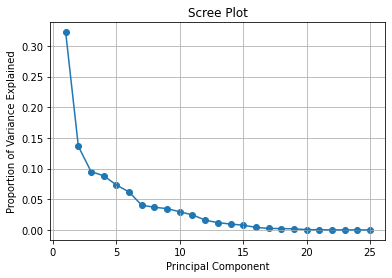

In [29]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,data_std.shape[1] + 1),importance)
plt.plot(range(1,data_std.shape[1] + 1),importance)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.grid()
plt.show()

## (e) (10%) Use the selected PCs and perform Logistic Regression to predict the defect type “Bumps” again. What’s the accuracy and confusion matrix?

In [30]:
pca = PCA(n_components=9).fit(data_std)
new_pca_df = pd.DataFrame(pca.transform(data_std), columns = ['PCA' + str(i) for i in range(9)])
new_pca_df.head()

,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8
0,-0.628909,2.879399,-0.160391,-1.249977,-0.607135,1.678530,-0.303931,1.527977,0.677213
1,-1.939092,1.699455,-0.310036,0.658585,0.655409,0.047194,0.109829,1.349166,-0.236190
2,-2.693961,0.990825,0.397029,0.829704,-0.022910,-0.134262,0.121729,1.089207,-0.262250
3,-1.759154,2.667600,1.387773,-0.727985,-0.271478,-0.989332,2.238217,1.221490,-0.537061
4,1.085173,4.130187,0.343260,-0.510050,-0.263453,-2.163243,0.569558,0.473940,1.123331


In [31]:
x_train, x_test, y_train, y_test = train_test_split(new_pca_df, y, test_size=0.2, shuffle=True, random_state=6)

clf = LogisticRegressionCV(penalty='l2', solver='lbfgs', cv=5).fit(x_train, y_train.values.ravel())
predict = clf.predict(x_test)
clf.predict_proba(x_test)[:10]

array([[0.98891275, 0.01108725],
       [0.79676472, 0.20323528],
       [0.40181353, 0.59818647],
       [0.94977196, 0.05022804],
       [0.52270826, 0.47729174],
       [0.96761532, 0.03238468],
       [0.68728662, 0.31271338],
       [0.49727506, 0.50272494],
       [0.97519803, 0.02480197],
       [0.83815589, 0.16184411]])

In [32]:
print("Accuracy score:", clf.score(x_test, y_test))
matrix = confusion_matrix(y_test,predict)
matrix

Accuracy score: 0.8329048843187661


array([[301,  11],
       [ 54,  23]])

Accuracy: 0.833

Confusion matrix: 
$ \begin{pmatrix}
  301 & 11 \\
  54 & 23 \\
 \end{pmatrix}$

## (f) (5%) What conclusions can you draw from above analysis? Give a comparison between (a) and (e). The results are consistent?

從有無pca的使用可以發現準確率其實沒什麼改變，有使用pca時準確率有上升一點點而已，但從confusion matrix會發現到兩種方法預測結果還是有差異的(例如：答案跟預測值都是0的數量有增加，但其他的則是減少)，因此結果並不一致，會有這樣情況我推測是pca挑出的特徵都是其他特徵的線性組合，所以生成的模型會跟原始的模型不一樣，間接導致預測的結果也會不一樣，除此之外pca其實是unsupervised learning，機器並不知道所做的線性組合是不是最佳的，所以也無法確保做完pca都預測能力都有明顯的提升，但是pca可以將資料降維因此會將模型訓練時間減少。

# References

1.   https://stackoverflow.com/questions/31909945/obtain-eigen-values-and-vectors-from-sklearn-pca
2.   https://www.cupoy.com/qa/club/ai_tw/0000016D6BA22D97000000016375706F795F72656C656173654B5741535354434C5542/0000017BBAC93495000000186375706F795F72656C656173655155455354
3.   https://www.datasklr.com/ols-least-squares-regression/multicollinearity

